<div style="text-align: center;">
  <h1>AML-3204 Social Media Analytics</h1>
  <h2>Assignment-1_Part-1 (10%)</h2>
  <h2>Analyzing YouTube Data</h2>
</div>

# a. Data Collection Procedure

In [1]:
# import requried library
from googleapiclient.discovery import build
import pandas as pd
import isodate

In [2]:
# Enter api key and sample youtube video id
API_KEY = 'Enter your API'
vid = 'mEsleV16qdo'

**Top 100 Comments of sample video**

In [3]:
import requests

API_KEY = API_KEY
VIDEO_ID = vid
COMMENTS_API_URL = 'https://www.googleapis.com/youtube/v3/commentThreads'

def get_video_comments(video_id, api_key, max_results=100):
    comments = []
    page_token = ''
    while len(comments) < max_results:
        params = {
            'part': 'snippet',
            'videoId': video_id,
            'key': api_key,
            'textFormat': 'plainText',
            'maxResults': 100,
            'pageToken': page_token
        }
        response = requests.get(COMMENTS_API_URL, params=params)
        data = response.json()

        if 'items' not in data:
            break

        for item in data['items']:
            comments.append(item['snippet']['topLevelComment']['snippet']['textDisplay'])
            if len(comments) >= max_results:
                break

        page_token = data.get('nextPageToken')
        if not page_token:
            break

    return comments

video_responses = get_video_comments(VIDEO_ID, API_KEY, max_results=100)
count = 0
for comment in video_responses:
    count += 1
    print(f'\nComment-{count}: ')
    print(comment)


Comment-1: 
just completed it in 15 days. Woof.

Comment-2: 
Did anyone completed half or a considerable hour? Can you tell me if its good?

Comment-3: 
Mobail number pls sir

Comment-4: 
Sir i want to talk with you sir

Comment-5: 
Sir pls my son was start corse  But Sir camplit  corse cartificet ??

Comment-6: 
langchain version used in video is not updated. all the methods used in video are deprecated

Comment-7: 
Kudos

Comment-8: 
Thank you sir for this magnificant tuto

Comment-9: 
Thank you for the content.

Comment-10: 
This video wastes so much of the user's time at every step. It could easily have been made in a fraction of the runtime without any loss.

Comment-11: 
Any one tell me how to continue our anaconda prompt and jupyter notebook after shuting down our pc or laptop

Comment-12: 
He is dragging too much. Should be crisp and short

Comment-13: 
I am from non it background so pls confirm if this valuable for me?

Comment-14: 
mister ur name?

Comment-15: 
great

Commen

**Getting video description of sample video**

In [4]:
VIDEO_API_URL = 'https://www.googleapis.com/youtube/v3/videos'

def get_video_description(video_id, api_key):
    params = {
        'part': 'snippet',
        'id': video_id,
        'key': api_key
    }
    response = requests.get(VIDEO_API_URL, params=params)
    data = response.json()
    
    if 'items' in data and len(data['items']) > 0:
        return data['items'][0]['snippet']['description']
    else:
        return 'No description available.'

description = get_video_description(VIDEO_ID, API_KEY)
print('Video Description:')
print(description)


Video Description:
Learn about generative models and different frameworks, investigating the production of text and visual material produced by artificial intelligence. This course was originally recorded live.

Instructors:  Krish Naik, Sunny Savita, and Boktiar Ahmed Bappy.  
 
For course details, visit: https://ineuron.ai/course/generative-ai-community-edition

⌨️ (00:00:00) DAY 1: Introduction to Generative AI Community Course
⌨️ (01:44:14) DAY 2: Introduction to OpenAI and understanding the OpenAI API
⌨️ (03:37:49) DAY 3: Introduction to LangChain
⌨️ (05:16:48) Day 4: Hugging Face API + Langchain
⌨️ (07:13:08) DAY 5: Memory in Langchain
⌨️ (09:07:53) DAY 6: LLM Generative AI Project using OpenAI & LangChain
⌨️ (11:03:29) DAY 7: LLM Generative AI Project & Deployment
⌨️ (13:09:02) DAY 8: Introduction to Vector Database for AI & LLM
⌨️ (14:52:41) DAY 9: Mastering Vector Databases with Pinecone
⌨️ (17:02:19) DAY 10: Mastering ChromaDB Vector Databases
⌨️ (19:04:25) DAY 11: Introducin

**Getting video's view count of sample video**

In [5]:
def get_video_view_count(video_id, api_key):
    params = {
        'part': 'statistics',
        'id': video_id,
        'key': api_key
    }
    response = requests.get(VIDEO_API_URL, params=params)
    data = response.json()
    
    if 'items' in data and len(data['items']) > 0:
        statistics = data['items'][0]['statistics']
        return statistics['viewCount']
    else:
        return 'No view count available.'

view_count = get_video_view_count(VIDEO_ID, API_KEY)
print('View Count:')
print(view_count)


View Count:
769805


**Getting video's like count of sample video**

In [6]:
def get_video_like_count(video_id, api_key):
    params = {
        'part': 'statistics',
        'id': video_id,
        'key': api_key
    }
    response = requests.get(VIDEO_API_URL, params=params)
    data = response.json()
    
    if 'items' in data and len(data['items']) > 0:
        statistics = data['items'][0]['statistics']
        return statistics['likeCount']
    else:
        return 'No like count available.'

like_count = get_video_like_count(VIDEO_ID, API_KEY)
print('Like Count:')
print(like_count)


Like Count:
29562


**Getting video's dislike count of sample video**

In [7]:
def get_video_dislike_count(video_id, api_key):
    params = {
        'part': 'statistics',
        'id': video_id,
        'key': api_key
    }
    response = requests.get(VIDEO_API_URL, params=params)
    data = response.json()
    
    if 'items' in data and len(data['items']) > 0:
        statistics = data['items'][0]['statistics']
        return statistics.get('dislikeCount', 'Dislike count not available.')
    else:
        return 'No dislike count available.'

dislike_count = get_video_dislike_count(VIDEO_ID, API_KEY)
print('Dislike Count:')
print(dislike_count)


Dislike Count:
Dislike count not available.


**Getting video's comments count of sample video**

In [8]:
def get_video_comment_count(video_id, api_key):
    params = {
        'part': 'statistics',
        'id': video_id,
        'key': api_key
    }
    response = requests.get(VIDEO_API_URL, params=params)
    data = response.json()
    
    if 'items' in data and len(data['items']) > 0:
        statistics = data['items'][0]['statistics']
        return statistics.get('commentCount', 'Comment count not available.')
    else:
        return 'No comment count available.'

comment_count = get_video_comment_count(VIDEO_ID, API_KEY)
print('Comment Count:')
print(comment_count)

Comment Count:
975


**Getting duration of sample video**

contentDetails.duration	string
The length of the video. The property value is an ISO 8601 duration. For example, for a video that is at least one minute long and less than one hour long, the duration is in the format PT#M#S, in which the letters PT indicate that the value specifies a period of time, and the letters M and S refer to length in minutes and seconds, respectively. The # characters preceding the M and S letters are both integers that specify the number of minutes (or seconds) of the video. For example, a value of PT15M33S indicates that the video is 15 minutes and 33 seconds long.

If the video is at least one hour long, the duration is in the format PT#H#M#S, in which the # preceding the letter H specifies the length of the video in hours and all of the other details are the same as described above. If the video is at least one day long, the letters P and T are separated, and the value's format is P#DT#H#M#S. Please refer to the ISO 8601 specification for complete details.

In [9]:
from isodate import parse_duration

def get_video_duration(video_id, api_key):
    params = {
        'part': 'contentDetails',
        'id': video_id,
        'key': api_key
    }
    response = requests.get(VIDEO_API_URL, params=params)
    data = response.json()
    
    if 'items' in data and len(data['items']) > 0:
        content_details = data['items'][0]['contentDetails']
        duration = content_details['duration']
        return parse_duration(duration)
    else:
        return 'No duration available.'

duration = get_video_duration(VIDEO_ID, API_KEY)
if duration != 'No duration available.':
    print('Duration:')
    print(duration)
else:
    print(duration)


Duration:
1 day, 6:18:02


**Function that can get viewcount, likecount, dislikecount and commentcount of sample video**

In [10]:
def get_video_statistics(video_id, api_key):
    params = {
        'part': 'statistics',
        'id': video_id,
        'key': api_key
    }
    response = requests.get(VIDEO_API_URL, params=params)
    data = response.json()
    
    if 'items' in data and len(data['items']) > 0:
        statistics = data['items'][0]['statistics']
        return {
            'viewCount': statistics.get('viewCount', 'No data'),
            'likeCount': statistics.get('likeCount', 'No data'),
            'dislikeCount': statistics.get('dislikeCount', 'No data'),
            'commentCount': statistics.get('commentCount', 'No data')
        }
    else:
        return 'No statistics available.'

stats = get_video_statistics(VIDEO_ID, API_KEY)
if stats != 'No statistics available.':
    print('View Count:', stats['viewCount'])
    print('Like Count:', stats['likeCount'])
    print('Dislike Count:', stats['dislikeCount'])
    print('Comment Count:', stats['commentCount'])
else:
    print(stats)

View Count: 769805
Like Count: 29562
Dislike Count: No data
Comment Count: 975


### Divide the data in 5 parts to scrap the data 

In [11]:

# input_csv_path = 'vdoLinks.csv'
# df = pd.read_csv(input_csv_path)

# total_rows = len(df)
# chunk_size = total_rows // 5  

# parts = []
# for i in range(4):
#     if i < 3:
#         part = df.iloc[i * chunk_size:(i + 1) * chunk_size]
#     else:
#         part = df.iloc[i * chunk_size:] 
#     parts.append(part)

# for idx, part in enumerate(parts):
#     part.to_csv(f'part_{idx + 1}.csv', index=False)
#     print(f'Part {idx + 1} saved as part_{idx + 1}.csv')

**Function that can get statistics of youtube video**

In [12]:
def get_video_statistics(video_id, api_key):
    params = {
        'part': 'snippet,statistics,contentDetails',
        'id': video_id,
        'key': api_key
    }
    response = requests.get(VIDEO_API_URL, params=params)
    data = response.json()
    
    if 'items' in data and len(data['items']) > 0:
        statistics = data['items'][0]['statistics']
        content_details = data['items'][0]['contentDetails']
        snippet = data['items'][0]['snippet']
        
        comments = get_comments(video_id, api_key)
        
        return {
            'viewCount': statistics.get('viewCount', 'No data'),
            'likeCount': statistics.get('likeCount', 'No data'),
            'dislikeCount': statistics.get('dislikeCount', 'No data'),
            'commentCount': statistics.get('commentCount', 'No data'),
            'duration': content_details.get('duration', 'No data'),
            'description': snippet.get('description', 'No data'),
            'comments': comments
        }
    else:
        return {
            'viewCount': 'No data',
            'likeCount': 'No data',
            'dislikeCount': 'No data',
            'commentCount': 'No data',
            'duration': 'No data',
            'description': 'No data',
            'comments': []
        }

def get_comments(video_id, api_key, max_results=100):
    params = {
        'part': 'snippet',
        'videoId': video_id,
        'key': api_key,
        'maxResults': max_results,
        'textFormat': 'plainText'
    }
    response = requests.get(COMMENTS_API_URL, params=params)
    data = response.json()
    
    comments = []
    if 'items' in data:
        for item in data['items']:
            comment = item['snippet']['topLevelComment']['snippet']['textDisplay']
            comments.append(comment)
    
    return comments

def parse_duration(durations):
    parsed_durations = []
    for duration in durations:
        try:
            parsed_duration = isodate.parse_duration(duration)
            parsed_durations.append(parsed_duration)
        except Exception:
            parsed_durations.append('No data')
    return parsed_durations

In [13]:
api_keys = ['Enter api keys']

**By using this function we can fetch the data from our csv file and apply the statistics fuction and can save to csv file**

In [14]:
def output():
    
    input_csv_path = 'part_4.csv'
    output_csv_path = 'output_4.csv'
    
    df = pd.read_csv(input_csv_path)
    
    view_counts = []
    like_counts = []
    dislike_counts = []
    comment_counts = []
    durations = []
    descriptions = []
    comments_data = []

    for vid in df['youtubeId']:
        stats = get_video_statistics(vid, api_keys[4])
        view_counts.append(stats['viewCount'])
        like_counts.append(stats['likeCount'])
        dislike_counts.append(stats['dislikeCount'])
        comment_counts.append(stats['commentCount'])
        durations.append(stats['duration'])
        descriptions.append(stats['description'])
        comments_data.append(stats['comments'])

    df['viewCount'] = view_counts
    df['likeCount'] = like_counts
    df['dislikeCount'] = dislike_counts
    df['commentCount'] = comment_counts
    df['duration'] = parse_duration(durations)
    df['description'] = descriptions
    df['comments'] = comments_data
    
    df.to_csv(output_csv_path, index=False)
    print(f'Successfully saved to {output_csv_path}')

# if __name__ == "__main__":
#     output()

We had run above function 5 times to scrap the data now we will merge that data and made new csv file to work further

In [15]:
def merge_and_remove_duplicates(csv_files, output_csv_path):
    
    dfs = []
    for csv_file in csv_files:
        df = pd.read_csv(csv_file,encoding='latin-1')
        dfs.append(df)

    # Step 2: Merge DataFrames based on 'youtubeId'
    merged_df = pd.concat(dfs[:-1], ignore_index=True)  
    
    # Step 3: Drop duplicate rows based on 'youtubeId'
    merged_df.drop_duplicates(subset=['youtubeId'], inplace=True)

    # Step 4: Save the merged DataFrame to a CSV file
    merged_df.to_csv(output_csv_path, index=False)
    print(f'Successfully saved merged data to {output_csv_path}')

# if __name__ == "__main__":
#     csv_files = ['output_1.csv', 'output_2.csv', 'output_3.csv', 'output_4.csv', 'output_5.csv']
#     output_csv_path = 'output.csv'
    
#     merge_and_remove_duplicates(csv_files, output_csv_path)


Successfully saved merged data to output.csv


In [2]:
df = pd.read_csv('output.csv',encoding='latin-1')
df.head()

,youtubeId,movieId,title,viewCount,likeCount,dislikeCount,commentCount,duration,description,comments
0,K26_sDKnvMU,1,Toy Story (1995),116509,150,No data,0,0:01:31,Trailer for Toy Story (1995) captured from the...,[]
1,3LPANjHlPxo,2,Jumanji (1995),196560,286,No data,No data,0:02:48,Jumanji Trailer 1995\nDirector: Joe Johnston\n...,[]
2,rEnOoWs3FuA,3,Grumpier Old Men (1995),221328,220,No data,13,0:01:52,"The more things change, the more they stay the...","['Buena pelÃ­cula de comedia romÃ¡ntica', '1:3..."
3,j9xml1CxgXI,4,Waiting to Exhale (1995),433185,No data,No data,No data,0:02:40,Whitney Houston and Angela Bassett star in thi...,[]
4,ltwvKLnj1B4,5,Father of the Bride Part II (1995),No data,No data,No data,No data,No data,No data,[]


# b. Data cleansing steps

In [3]:
# getting unique values of all columns
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}': {unique_values}")

Unique values in 'youtubeId': ['K26_sDKnvMU' '3LPANjHlPxo' 'rEnOoWs3FuA' ... 'v29P-wchMZQ' 'dAz-nZ65jYU'
 'YWmbl_7VVYk']
Unique values in 'movieId': [     1      2      3 ... 131258 131260 131262]
Unique values in 'title': ['Toy Story (1995)' 'Jumanji (1995)' 'Grumpier Old Men (1995)' ...
 'The Pirates (2014)' 'Rentun Ruusu (2001)' 'Innocence (2014)']
Unique values in 'viewCount': ['116509' '196560' '221328' ... '48111' '82062' '3441']
Unique values in 'likeCount': ['150' '286' '220' ... '1852' '7988' '1250']
Unique values in 'dislikeCount': ['No data']
Unique values in 'commentCount': ['0' 'No data' '13' '668' '225' '3' '10' '241' '751' '14' '76' '115' '39'
 '57' '199' '515' '56' '11' '441' '1121' '7' '22' '9' '161' '86' '2166'
 '38' '58' '117' '73' '677' '4' '2' '5' '6' '104' '1' '151' '102' '87'
 '207' '15' '21' '85' '34' '23' '140' '17' '64' '242' '483' '125' '155'
 '336' '20' '18' '35' '74' '16' '28' '12' '49' '24' '90' '171' '19' '26'
 '129' '53' '60' '29' '162' '665' '123' '343'

In [4]:
# replacing no data values with null value
df.replace('No data', pd.NA, inplace=True)

In [5]:
columns_to_check = ['viewCount', 'likeCount', 'commentCount', 'duration', 'description']

# Drop rows where all specified columns have null values
df_cleaned = df.dropna(subset=columns_to_check, how='all')

# Reset the index if needed
df_cleaned.reset_index(drop=True, inplace=True)

In [6]:
# Drop the 'dislikeCount' column as it contains all null values
df_cleaned = df_cleaned.drop(columns=['dislikeCount'])

In [7]:
df_cleaned.to_csv('output1.csv', index=False)

In [11]:
df_cleaned['comments'].head(12)

0                                                    []
1                                                    []
2     ['Buena pelÃ­cula de comedia romÃ¡ntica', '1:3...
3                                                    []
4     ["Oh these soothing trailers \nWhy can't we ha...
5                                                    []
6                                                    []
7     ['The Goldfinger of our generation. Brosnans b...
8     ['Why does this have the Little Women (1994) s...
9     ['The last line in the trailer with Dracula wa...
10    ['Nothing like a leftist liberal Democrat maki...
11    ['one of the best movies', "Saw this lin theat...
Name: comments, dtype: object

In [12]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import ast 

In [13]:
def clean_text(text):
    # Check if text is NaN or None, return empty string if so
    if pd.isnull(text) or text == '':
        return ''
    
    # Handle lists represented as strings (like "['item1', 'item2']")
    try:
        comments = ast.literal_eval(text)
    except (ValueError, SyntaxError):
        comments = [text]  # If not a valid list, treat as single comment
    
    # Initialize list to store cleaned comments
    cleaned_comments = []
    
    # Loop through each comment
    for comment in comments:
        # Tokenization
        tokens = word_tokenize(comment)
        
        # Convert to lowercase
        tokens = [word.lower() for word in tokens]
        
        # Remove punctuation
        tokens = [word for word in tokens if word not in string.punctuation]
        
        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        tokens = [word for word in tokens if word not in stop_words]
        
        # Lemmatization
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(word) for word in tokens]
        
        # Join tokens back into text
        cleaned_comment = ' '.join(tokens)
        
        # Append cleaned comment to list
        cleaned_comments.append(cleaned_comment)
    
    # Join cleaned comments back into a single string separated by commas
    cleaned_text = ', '.join(cleaned_comments)
    
    return cleaned_text

In [14]:
# Apply cleaning function to the 'comments' column
df_cleaned['cleaned_comments'] = df_cleaned['comments'].apply(clean_text)

# Display the cleaned text
df_cleaned['cleaned_comments'].head(12)

0                                                      
1                                                      
2     buena pelã­cula de comedia romã¡ntica, 1:36 gr...
3                                                      
4     oh soothing trailer ca n't stead dhus dhus dhu...
5                                                      
6                                                      
7     goldfinger generation brosnans best plus n64 g...
8     little woman 1994 score specifically `` orchar...
9     last line trailer dracula cut sadly, movie hil...
10    nothing like leftist liberal democrat making m...
11    one best movie, saw lin theater back '95, ever...
Name: cleaned_comments, dtype: object

In [26]:
# Convert columns to numeric, setting errors='coerce' to turn non-numeric values to NaN
df_cleaned['viewCount'] = pd.to_numeric(df_cleaned['viewCount'], errors='coerce')
df_cleaned['likeCount'] = pd.to_numeric(df_cleaned['likeCount'], errors='coerce')
df_cleaned['commentCount'] = pd.to_numeric(df_cleaned['commentCount'], errors='coerce')

# Drop rows with NaN values
df_cleaned = df_cleaned.dropna(subset=['viewCount', 'likeCount', 'commentCount'])

# 1. A list of top-10 videos based on total view

In [31]:

top_10_videos = df_cleaned.sort_values(by='viewCount', ascending=False).head(10)

print(top_10_videos)

         youtubeId movieId                                  title  \
14267  450p7goxZqg  111226                       All of Me (2013)   
15662  dNJdJIwCF_Y  120853                 Fresh Guacamole (2012)   
16093  z5rRZdiu1UE  126106          Beastie Boys: Sabotage (1994)   
3940   j-V12tL78Mc    5364                      Unfaithful (2002)   
13092  NVcSNnqRD0c  104076                   Smurfs 2, The (2013)   
9514   SvGcGjIc16I   76189                          Growth (2009)   
10905  3H8bnKdf654   87520  Transformers: Dark of the Moon (2011)   
14384  9ItBvH5J6ss  111921          The Fault in Our Stars (2014)   
16036  sdUUx5FdySs  125926                           Kiwi! (2006)   
12913  pdbI0Fn4COQ  103203                            Eden (2012)   

          viewCount   likeCount  commentCount duration  \
14267  2.380445e+09  13160813.0      255442.0  0:05:08   
15662  4.772083e+08   2890215.0       72951.0  0:01:41   
16093  1.304351e+08    828844.0       31401.0  0:03:04   
3940   1

# c. Using a bar diagram, show the top-10 videos based on total views

/var/folders/wp/gkxhfvbs4k11mv6xndb3k_gm0000gn/T/ipykernel_28264/905093272.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='viewCount', y='title', data=top_10_videos, palette='viridis')


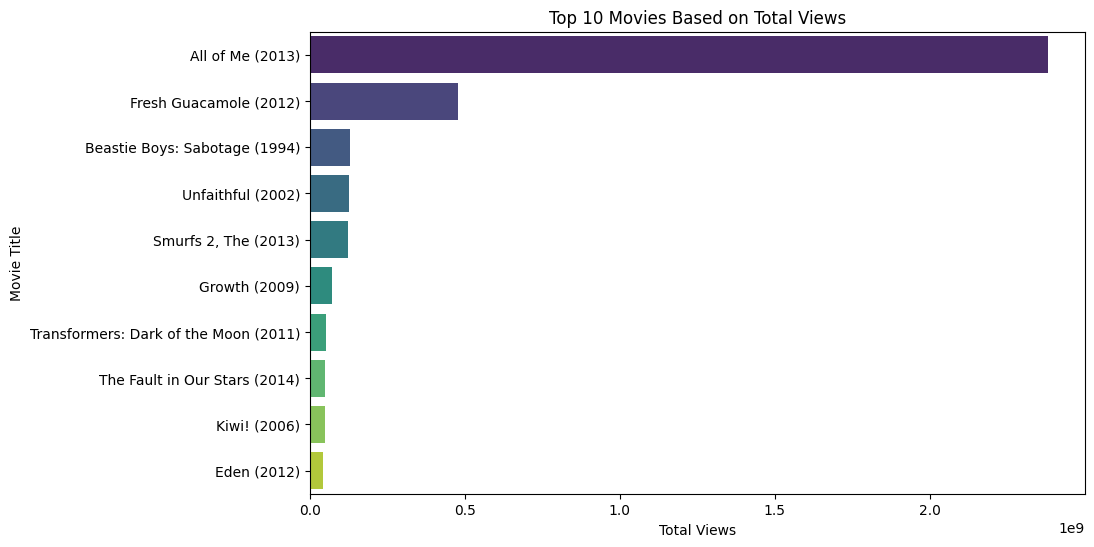

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

sns.barplot(x='viewCount', y='title', data=top_10_videos, palette='viridis')

plt.xlabel('Total Views')
plt.ylabel('Movie Title')
plt.title('Top 10 Movies Based on Total Views')

plt.show()

In [33]:
import plotly.express as px

fig = px.bar(top_10_videos, 
             x='viewCount', 
             y='title', 
             orientation='h', 
             color='viewCount', 
             color_continuous_scale='viridis',
             labels={'viewCount': 'Total Views', 'title': 'Movie Title'},
             title='Top 10 Movies Based on Total Views')

fig.update_layout(xaxis_title='Total Views', 
                  yaxis_title='Movie Title',
                  title={'x':0.5}) 

fig.show()

# 2.	A list of the bottom-10 videos based on the total views

In [34]:
bottom_10_videos = df_cleaned.sort_values(by='viewCount', ascending=True).head(10)
statistics_columns = ['youtubeId', 'movieId', 'title', 'viewCount', 'likeCount', 'commentCount', 'duration']
print('Bottom 10 Videos Based on Total Views:')
print(bottom_10_videos)

Bottom 10 Videos Based on Total Views:
         youtubeId movieId                                            title  \
12846  HX7dx_w_Ol8  102860                                   Hilton! (2013)   
16387  EwM3gtL22E4  128856                                 Crockdale (2011)   
15141  hHJow-uF3A0  116945                                   Freedom (2009)   
13685  CA2QbzFUoQQ  107621                        Wooden Bridge, The (2012)   
14144  9B-65BWKwQM  110314  Me Two (Personne aux deux personnes, La) (2008)   
15576  tQplNZJL8XI  120208                           Flesh and Blood (1922)   
13805  zrhl2wZrvgI  108316                            American Scary (2006)   
13062  248-_S_5fAw  103910                                      Rafa (2012)   
13904  Yab8jYZIrhY  108977                            Paranoia Agent (2004)   
13896  rJHa94rACFs  108934                        We're Not Dressing (1934)   

       viewCount  likeCount  commentCount duration  \
12846       17.0        0.0          

# d. Using a bar diagram, show the bottom-10 videos based on total views

/var/folders/wp/gkxhfvbs4k11mv6xndb3k_gm0000gn/T/ipykernel_28264/2078568958.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




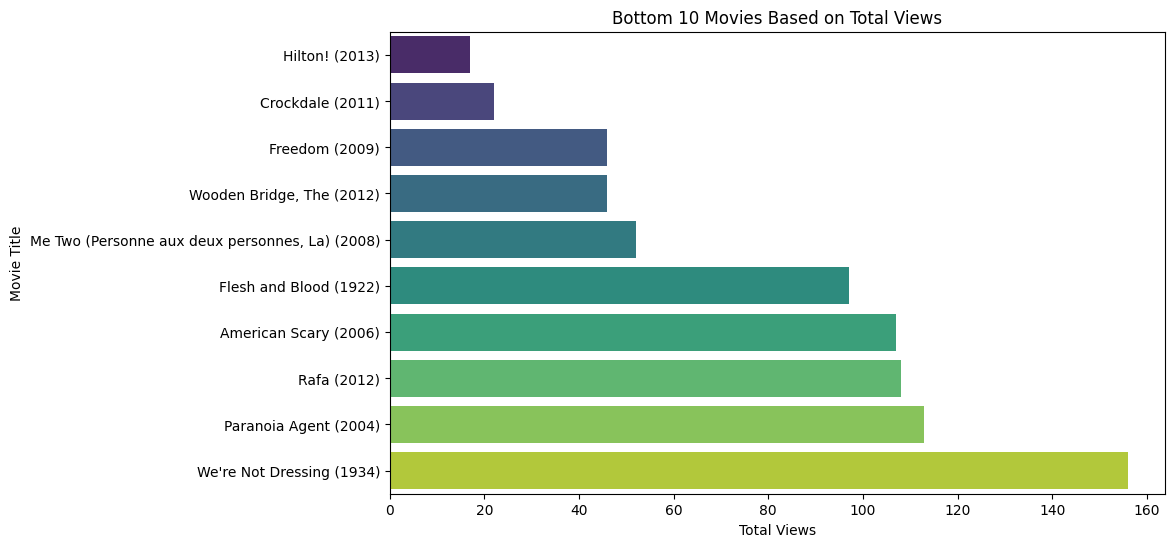

In [35]:
plt.figure(figsize=(10, 6))

sns.barplot(x='viewCount', y='title', data=bottom_10_videos, palette='viridis')

plt.xlabel('Total Views')
plt.ylabel('Movie Title')
plt.title('Bottom 10 Movies Based on Total Views')

plt.show()

In [36]:
fig = px.bar(bottom_10_videos, 
             x='viewCount', 
             y='title', 
             orientation='h', 
             color='viewCount', 
             color_continuous_scale='viridis',
             labels={'viewCount': 'Total Views', 'title': 'Movie Title'},
             title='Bottom 10 Movies Based on Total Views')

fig.update_layout(xaxis_title='Total Views', 
                  yaxis_title='Movie Title',
                  title={'x':0.5})  

fig.show()

# e. The title of the video that has the most likes

In [43]:
most_liked_video = df_cleaned.sort_values(by='likeCount', ascending=False).iloc[0]
statistics_columns = ['youtubeId', 'movieId', 'title', 'viewCount', 'likeCount', 'commentCount', 'duration']
print('The Most Liked Video:')
print(most_liked_video[statistics_columns])

The Most Liked Video:
youtubeId            450p7goxZqg
movieId                   111226
title           All of Me (2013)
viewCount           2380444944.0
likeCount             13160813.0
commentCount            255442.0
duration                 0:05:08
Name: 14267, dtype: object


# f. The title of the video that has the least likes

In [42]:
least_liked_video = df_cleaned.sort_values(by='likeCount', ascending=True).iloc[0]
statistics_columns = ['youtubeId', 'movieId', 'title', 'viewCount', 'likeCount', 'commentCount', 'duration']
print('The Least Liked Video:')
print(least_liked_video[statistics_columns])

The Least Liked Video:
youtubeId                  tQplNZJL8XI
movieId                         120208
title           Flesh and Blood (1922)
viewCount                         97.0
likeCount                          0.0
commentCount                       0.0
duration                       1:13:19
Name: 15576, dtype: object


# g. The title of the video that has the highest duration

In [41]:
video_with_highest_duration = df_cleaned.sort_values(by='duration', ascending=False).iloc[0]
statistics_columns = ['youtubeId', 'movieId', 'title', 'viewCount', 'likeCount', 'commentCount', 'duration']

print('Statistics of the Video with the Highest Duration:')
print(video_with_highest_duration[statistics_columns])

Statistics of the Video with the Highest Duration:
youtubeId                           eJ3RzGoQC4s
movieId                                  105250
title           Century of the Self, The (2002)
viewCount                             3376180.0
likeCount                               44018.0
commentCount                             1354.0
duration                                3:54:44
Name: 13298, dtype: object


# 6. Apply sentiment analysis on comments for each videos

In [44]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import seaborn as sns

df_cleaned['comments'] = df_cleaned['comments'].str.split(',')

# Step 2: Perform Sentiment Analysis
sid = SentimentIntensityAnalyzer()

def get_sentiment_score(comment):
    scores = [sid.polarity_scores(c)['compound'] for c in comment]
    return sum(scores) / len(scores)

df_cleaned['sentiment_score'] = df_cleaned['comments'].apply(get_sentiment_score)

# h. top-10 videos that have the highest positive sentiment scores

/var/folders/wp/gkxhfvbs4k11mv6xndb3k_gm0000gn/T/ipykernel_28264/2237187707.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




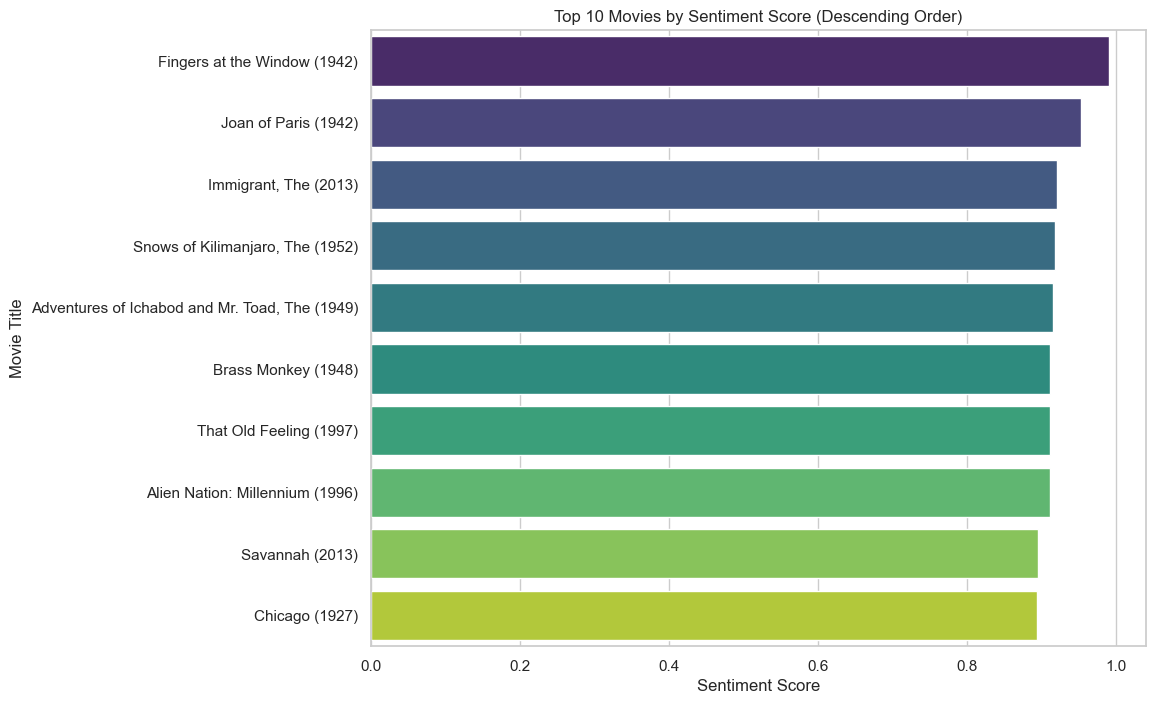

In [45]:
sns.set(style="whitegrid")

top_10_movies = df_cleaned.groupby('title')['sentiment_score'].mean().nlargest(10).index
top_10_df = df_cleaned[df_cleaned['title'].isin(top_10_movies)]

top_10_df = top_10_df.sort_values(by='sentiment_score', ascending=False)

plt.figure(figsize=(10, 8))  
sns.barplot(data=top_10_df, y='title', x='sentiment_score', estimator=sum, palette='viridis') 
plt.xlabel('Sentiment Score')
plt.ylabel('Movie Title')
plt.title('Top 10 Movies by Sentiment Score (Descending Order)')

plt.show()

In [46]:
top_10_movies = df_cleaned.groupby('title')['sentiment_score'].mean().nlargest(10).index
top_10_df = df_cleaned[df_cleaned['title'].isin(top_10_movies)]

# Sort the DataFrame by sentiment score in descending order
top_10_df = top_10_df.sort_values(by='sentiment_score', ascending=False)

# Plot using Plotly Express
fig = px.bar(top_10_df, 
             x='sentiment_score', 
             y='title', 
             orientation='h', 
             color='sentiment_score', 
             color_continuous_scale='viridis',
             labels={'sentiment_score': 'Sentiment Score', 'title': 'Movie Title'},
             title='Top 10 Movies by Sentiment Score (Descending Order)')

# Update the layout for better visualization
fig.update_layout(xaxis_title='Sentiment Score', 
                  yaxis_title='Movie Title',
                  title={'x':0.5})  # Center the title

# Show the plot
fig.show()

In [47]:

df_cleaned['viewCount'] = pd.to_numeric(df_cleaned['viewCount'], errors='coerce')
df_cleaned['likeCount'] = pd.to_numeric(df_cleaned['likeCount'], errors='coerce')
df_cleaned['commentCount'] = pd.to_numeric(df_cleaned['commentCount'], errors='coerce')

# Drop rows with NaN values
df_cleaned = df_cleaned.dropna(subset=['viewCount', 'likeCount', 'commentCount'])

In [48]:
df_cleaned.to_csv('output2.csv', index=False)